#Speech Processing Lab - Week 7

Name: S U Swakath 

Roll number: 180020036

Google Colab Link : https://colab.research.google.com/drive/1C7RMamYC-SDlL0zghFCD9mQJITNk3K3t?usp=sharing

**Aim**

* To understand the limitation of DTFT for the spectral analysis of speech.
* To understand the development of short-term Fourier transform (STFT) representation.
* To understand the difference in the nature of linear and log magnitude spectra.
* To understand the difference among the spectra of voiced, unvoiced and silence regions of speech.
* To plot the STFT of a speech signal.
* To understand the difference between true and convolved spectra.
* To understand the effect of rectangular, Hamming and Hanning window functions on short term spectral analysis.
* To understand the effect of frame size on short term spectral analysis


#Theory

**Intorduction**

The short term time domain analysis is useful for computing the time domain features at the gross level like energy,  zero crossing rate and autocorrelation. The different frequency or spectral components that are present in the speech signal are not directly apparent in the time domain. Hence we need to go for frequency domain representation using Fourier representation. The conventional Fourier representation studied in the first courseof signal processing is inadequate to provide information about the time varying nature of spectral information present in speech. Hence the need for short term version of Fourier transform, termed more commonly as Short term Fourier Transform (STFT) .

**DTFT**

From digital signal processing , to obtain the frequency domain representation we use discrete time Fourier transform (DTFT). If X(w) is the discrete time Fourier Transform(DTFT)  of  x(n),a discrete time signal, then its DTFT is given by

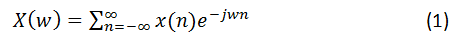

As given in equn (1), X(w) is continuous function of frequency and hence cannot be computed on a digital signal processor or machine. To make it possible discrete version of the DTFT termed as discrete Fourier transform (DFT) is defined where DFT is obtained by uniformly sampling X(w) is given by

$W(k) = W(w_k)$

where  $W_k = 2*\pi*k$ , k=0,1,....(N-1), where 'N' is the number of samples of X(w). The value of 'N' is chosen such that, the reconstructed sequence x(n) in the time domain is free from aliasing. For this the condition is 'N' should be greater than or equal to the length of x(n). Thus we have a tool called D.F.T for computing DTFT on a digital signal processor or machine.

**STFT**

To take care of time varying spectral information, the short term processing approach is employed. In short term processing, speech is processed is blocks of 10-30 ms with a shift of 10 ms. For instance, using a block size of 20 ms, the DTFT is computed using DFT for that block.  Their process is repeated for all the blocks of speech signal and all the spectra computed are stacked together as a function of time and frequency to observe the time varying spectra. To accommodate the time varying nature of this spectra, the DTFT equation is defined as given below

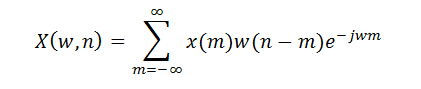

where W(n) is the window function for short term processing. Now the spectral amplitude and phase are function of both frequency and time where as it was only function of frequency in the earlier case of DTFT. x(m).w(n-m) represents the  window segment around the time instant 'n'. Hence X(w,n) at 'n' represents the spectrum of the speech segment present around it. When we shift 'n', then correspondent X(w,n) also changes. Thus giving visualization of the time varying spectra of speech. Since such a time-spectral is computed using short term processes, X(w,n) is termed as Short Term Fourier Transform (STFT).

#Problem A

DTFT of and its limitation:
* Plot the linear and log magnitude spectrum for the entire speech. 
* Plot log-magnitude spectrum of voiced, unvoiced and silence regions in the recorded speech and explain the difference between log-spectrum of all three cases.
* Comment on the limitation of DTFT.


In [1]:
# Mounting Google Drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
# Changing directory
%cd /content/gdrive/MyDrive/Sem6/Speech Lab/Week7
!ls

/content/gdrive/MyDrive/Sem6/Speech Lab/Week7
week7audio.wav	Week7.ipynb


In [4]:
# Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf

# Magnitude spuctrum plot function
def magnitudeSpectrum(sound):
    
  # Computing the FFT of the sound
  sound_len = sound.shape[0]
  sound_fft = fft(sound)/sound_len

  # Computing the frequency array
  freqs = fftfreq(sound_len, 1/fs)
  
  freqs = freqs[0:sound_len//2]
  fft_lin = np.abs(sound_fft[0:sound_len//2])
  fft_db = 2*np.log10(np.abs(sound_fft[0:sound_len//2]))
  return freqs,fft_lin,fft_db

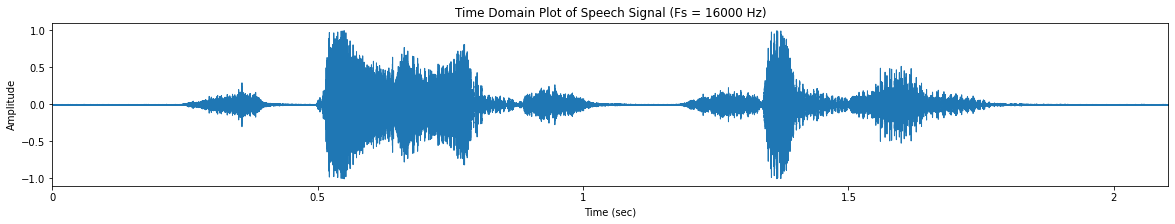

In [5]:
# Loading the audio into colab. Fs = 16kHz
audio, fs = librosa.load("week7audio.wav", sr = 16000)

# Plotting time domain plot of the audio
plt.figure(figsize=(20,3))
librosa.display.waveplot(audio, sr=fs);
plt.title("Time Domain Plot of Speech Signal (Fs = " +str(fs)+" Hz)")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

In [11]:
# Extracting different categories of sound in the speech
# The time stamp for each sound component was extracted from wavesurfer and they
# are as follows:
# /s/  - 0.236 s to 0.387 s
# /ee/ - 0.591 s to 0.756 s
# /ch/ - 0.883 s to 0.992 s
# /n/  - 1.407 s to 1.503 s
# sil  - 1.101 s to 1.165 s

s = audio[int(0.236*fs):int(0.387*fs)]
ee = audio[int(0.591*fs):int(0.756*fs)]
ch = audio[int(0.883*fs):int(0.992*fs)]
n = audio[int(1.407*fs):int(1.503*fs)]
sil = audio[int(1.101*fs):int(1.165*fs)]   

sounds = [s,ee,sil]
soundName = ['s','ee','sil']

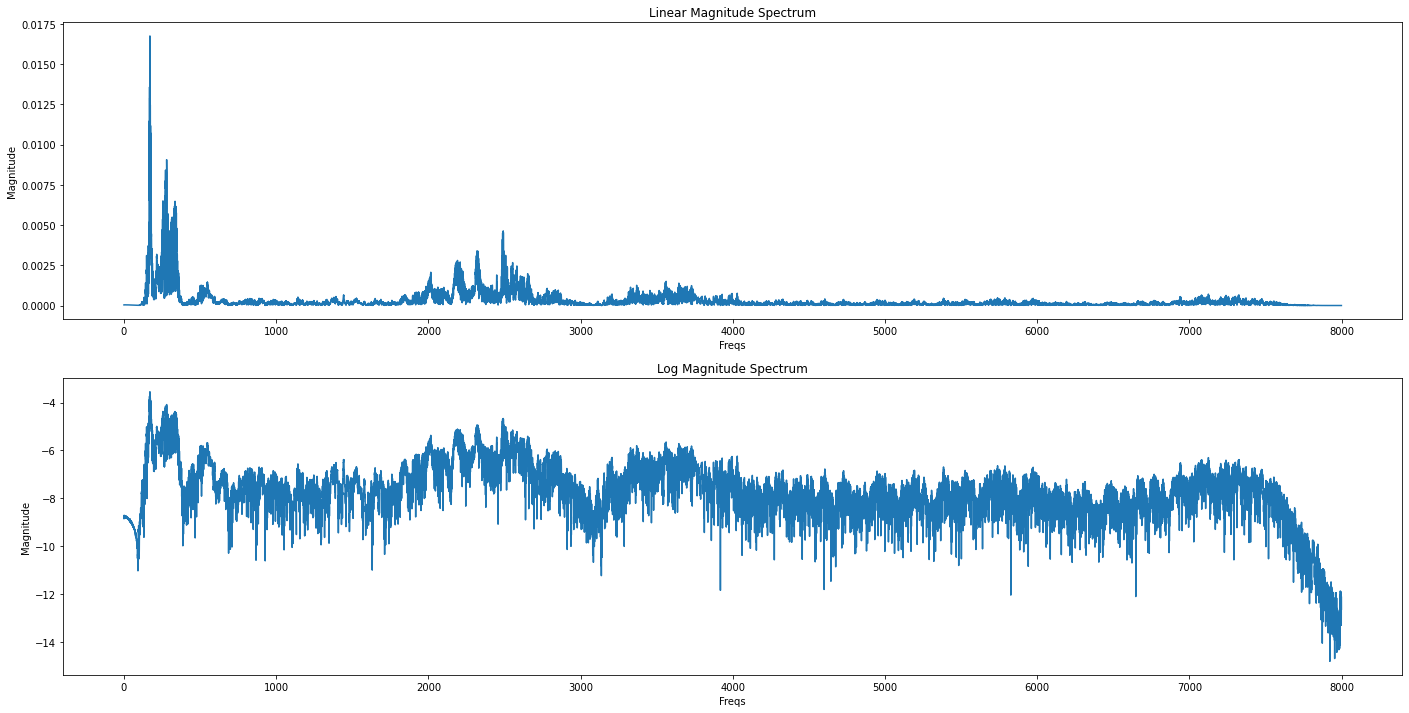

In [10]:
freqs,freq_lin,freq_db = magnitudeSpectrum(audio)
plt.figure(figsize=(24,12))
plt.subplot(2,1,1)
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum")
plt.xlabel("Freqs")
plt.ylabel("Magnitude")
plt.subplot(2,1,2)
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum")
plt.xlabel("Freqs")
plt.ylabel("Magnitude")
plt.show()

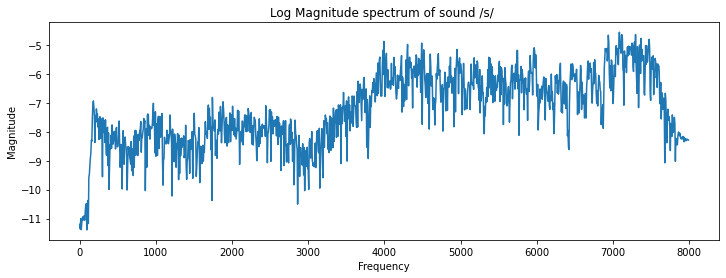

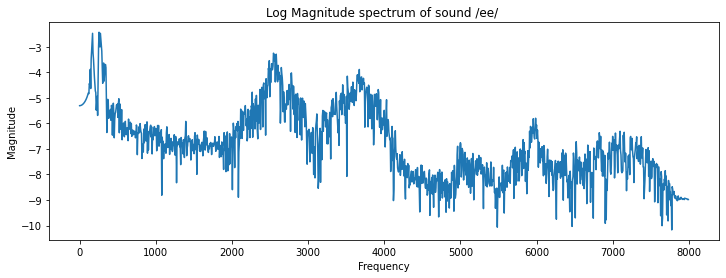

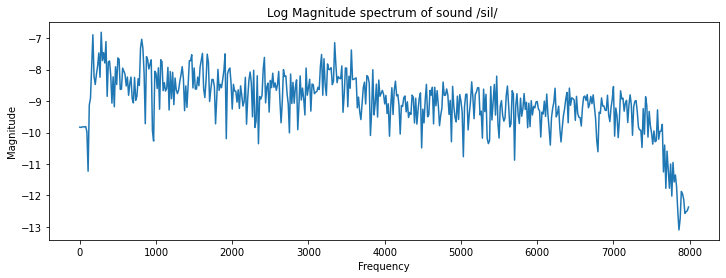

In [14]:
i = 0

for curSound in sounds:
  freqs,_,freq_db = magnitudeSpectrum(curSound)
  plt.figure(figsize=(12,4))
  plt.plot(freqs,freq_db)
  plt.title("Log Magnitude spectrum of sound /" + soundName[i] +"/ ")
  plt.xlabel("Frequency")
  plt.ylabel("Magnitude")
  plt.show()
  i = i+1

**Observation**

From the above magnitude spectrum plots we can observe that each sound component has different spectral properties. Due to this we conclude that speech is a non-stationary signal.

The magnitude spectrum of the entier speech signal provides the information about the different frequency components present in the signal, but not the information about when those frequency contents existed, that is, timing information is missing.

This is the limitation of Discrete Time Fourier Transform when we consider the whole non-stationary speech signal.

The essential information in the non-stationary signal is stored in the time varying spectrum. We cannot use the Discrete time Fourier Transform to analyse an non-stationary signal as we loss the time domin information in the process. To resolve this issue we consider small segments of an non-stationary signal to be stationary and compute the spectra of each segment (STFT).

#Problem B
Need for Short Time Fourier Transform(STFT):

* How can you solve the above problem using STFT? 
* Plot the STFT of one speech frame at the centre of above three regions. Write your observations.


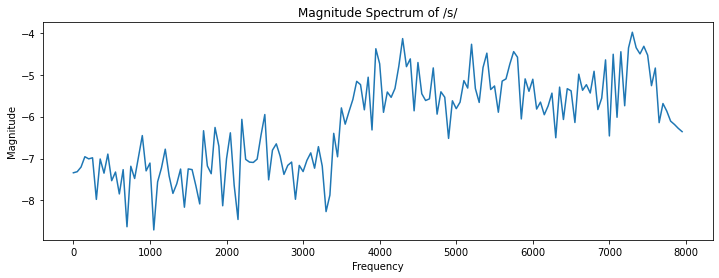

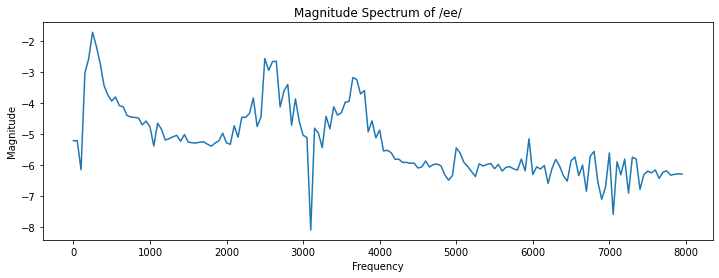

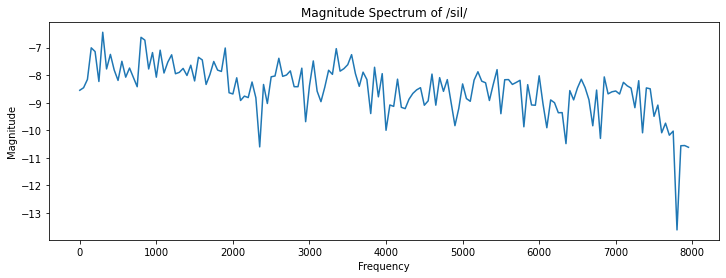

In [17]:
frameSize = 0.020 * fs
i = 0
N = int (frameSize/2)
for curSound in sounds:
  soundLen = len(curSound)
  mid = int (soundLen/2)
  curFrame = curSound[int (mid-N) : int (mid+N)]
  freqs,_,freq_db = magnitudeSpectrum(curFrame)
  plt.figure(figsize=(12,4))
  plt.plot(freqs,freq_db)
  plt.title("Magnitude Spectrum of /" + soundName[i] +"/" )
  plt.xlabel("Frequency")
  plt.ylabel("Magnitude")
  plt.show()
  i = i+1

**Observation**

* By taking a frame size between 20ms to 30ms, we can assume quasi-stationary condition. That is we assume that the signal is stationary in the short duration of 20 to 30 ms.
* Through STFT we can resolve the magnitude spectrum of different sub acquisition events present in the speech signal.

#Problem C

Concept of true and convolved spectra:

* Create a sine wave of 200Hz and compute DTFT of the whole signal. 
* Now also compute the STFT  by taking a 20-30ms short term segment of the sine wave. 
* Explain your observation and difference between the true and convolved spectrum.


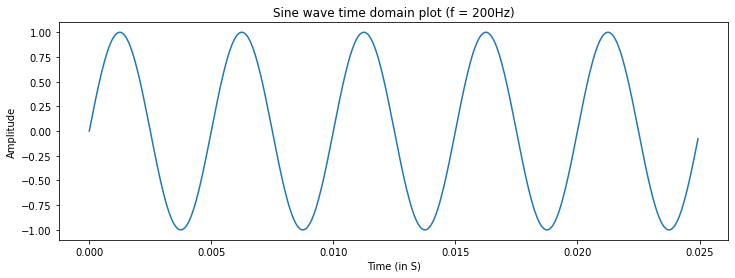

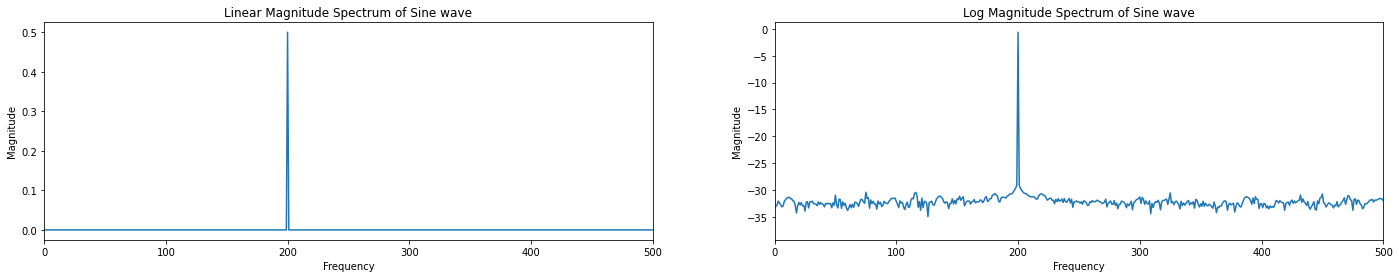

In [48]:
# Defining program variables
f = 200 # Sine wave frequency in Hz
t_max = 1 # Length of sine wave in seconds
t = np.arange(0,t_max,1/fs) # Time vector for sine wave computation
totalSamples = t_max*fs; # Total samples in the wave

# Computing Singletone Wave 
sineWave = np.sin(2*np.pi*f*t); # Singletone wave
plt.figure(figsize=(12,4))
plt.plot(t[0:int (5*fs/f)],sineWave[0:int (5*fs/f)])
plt.title("Sine wave time domain plot (f = 200Hz)")
plt.xlabel("Time (in S)")
plt.ylabel("Amplitude")
plt.show()

freqs,freq_lin,freq_db = magnitudeSpectrum(sineWave)
plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of Sine wave" )
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.xlim([0,500])

plt.subplot(1,2,2)
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of Sine wave" )
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.xlim([0,500])
plt.show()

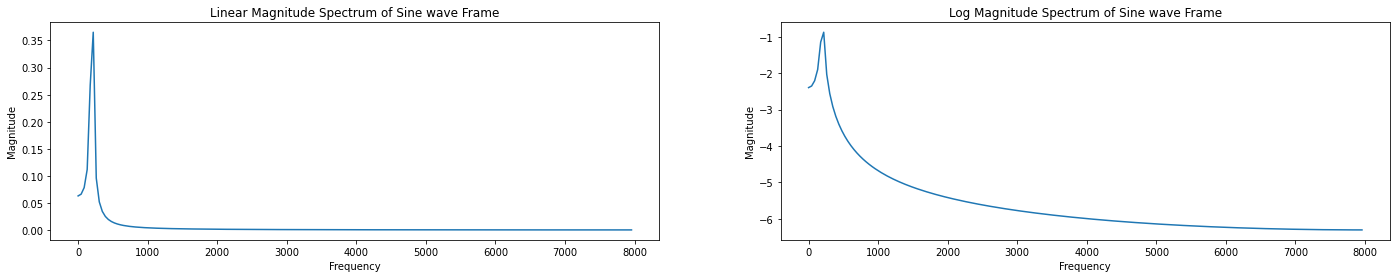

In [46]:
frameSize = int (0.023*fs)
sineFrame = sineWave[0:frameSize]
freqs,freq_lin,freq_db = magnitudeSpectrum(sineFrame)

plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
plt.plot(freqs,freq_lin)
plt.title("Linear Magnitude Spectrum of Sine wave Frame")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.subplot(1,2,2)
plt.plot(freqs,freq_db)
plt.title("Log Magnitude Spectrum of Sine wave Frame")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

**Observation**

1. The 230 ms long signal has a sharp peak in the linear as well as log magnitude spectrum at 200 Hz. This is because the 230 ms signal has interger number of periods of 200 Hz sine wave.
2. In case of short segment of duration 23 ms, we see the peak at 200 Hz has a lower height and there is energy in the higher frequency as well. Since we took only a 200 Hz sine wave, energy content at other frequencies is undesired. This occurs because of the discontinuities in the signal while applying DTFT on a finite length signal.
3. One way to deal with this problem is to attenuate the ends of the finite length signal by using windows like Hamming or Hanning.


#Problem D

Effect of windowing function and window size on short term spectral analysis:

* Plot short term log magnitude spectra of a 30 ms voiced speech segment  using a rectangular, hamming and hanning window functions. Compare and write your observations in all the three cases.
* Plot a short term log magnitude spectra of the voiced segment using a frame size of 3 ms, 30 ms and 300 ms. Compare and write your observations in all the three cases.

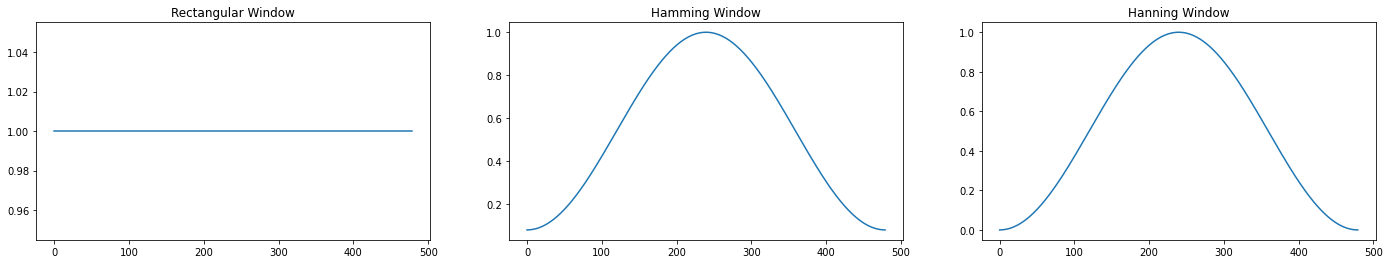

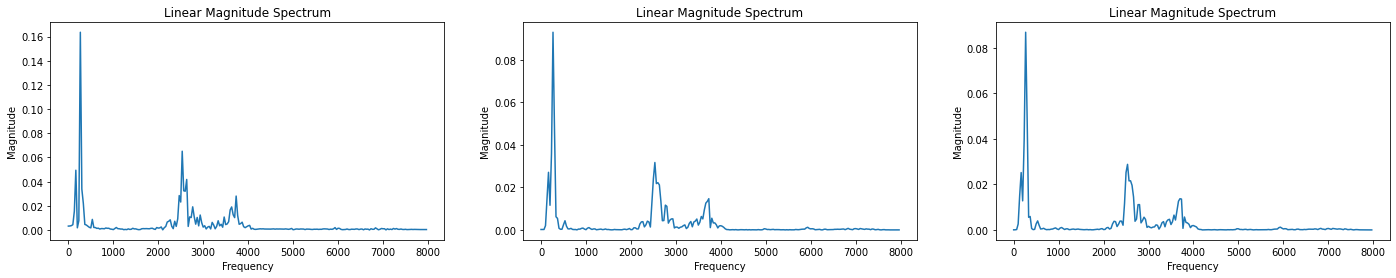

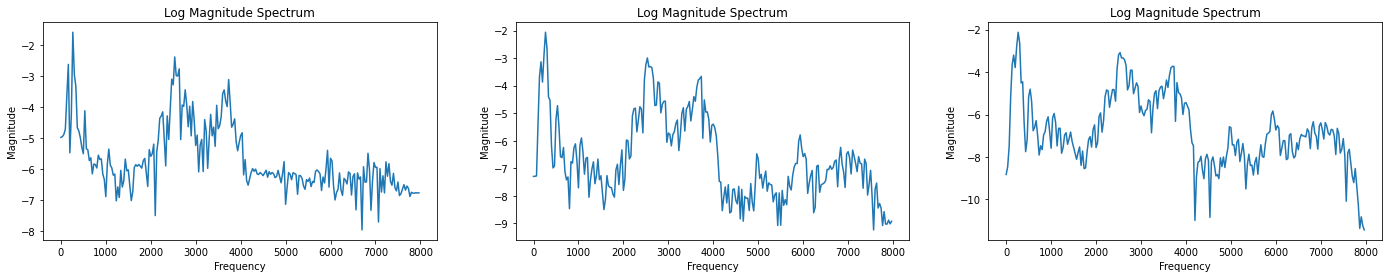

In [52]:
frameSize = int (0.030*fs)
ret = np.ones(frameSize)
ham = np.hamming(frameSize)
han = np.hanning(frameSize)
windows = [ret,ham,han]
windowNames = ['Rectangular', 'Hamming', 'Hanning']

mid = int (len(ee)/2)
N = int (frameSize/2)
soundFrame = ee[int (mid-N): int(mid+N)]
i = 0
plt.figure(figsize=(24,4))
for curWin in windows:
  plt.subplot(1,3,i+1)
  plt.title(windowNames[i] + " Window")
  plt.plot(curWin)
  i = i+1
plt.show()

i = 0 
plt.figure(figsize=(24,4))
for curWin in windows:
  freqs,freq_lin,_= magnitudeSpectrum(np.multiply(soundFrame,curWin))
  plt.subplot(1,3,i+1)
  plt.title("Linear Magnitude Spectrum")
  plt.plot(freqs,freq_lin)
  plt.xlabel("Frequency")
  plt.ylabel("Magnitude")
  i = i+1
plt.show()

i = 0 
plt.figure(figsize=(24,4))
for curWin in windows:
  freqs,_,freq_db= magnitudeSpectrum(np.multiply(soundFrame,curWin))
  plt.subplot(1,3,i+1)
  plt.title("Log Magnitude Spectrum")
  plt.plot(freqs,freq_db)
  plt.xlabel("Frequency")
  plt.ylabel("Magnitude")
  i = i+1
plt.show()


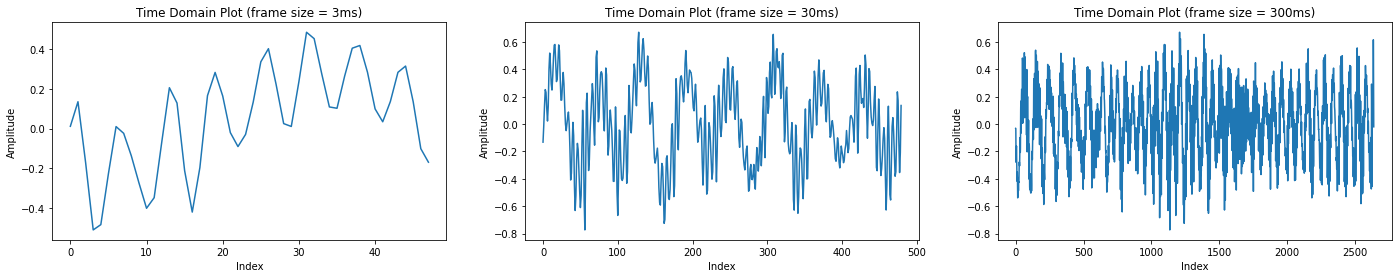

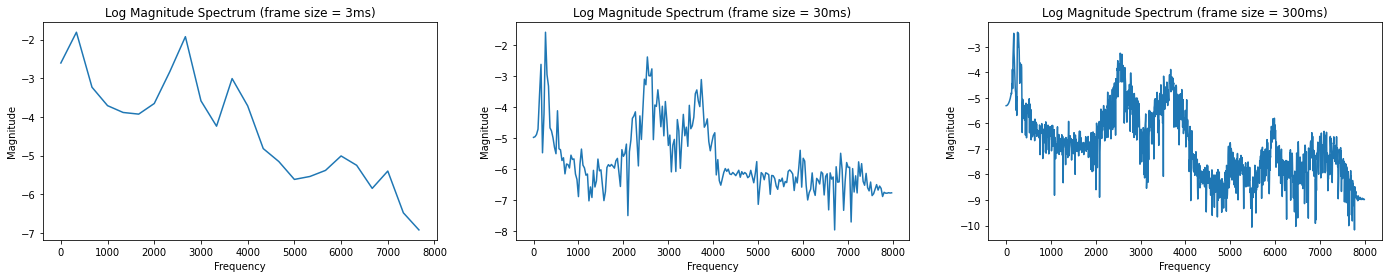

In [57]:
frameLength = [.003,.030]
mid = int (len(ee)/2)
frames = []
for curLen in frameLength:
  length = curLen*fs
  N = int (length/2)
  soundFrame = ee[int (mid-N): int(mid+N)]
  frames.append(soundFrame)
frames.append(ee)
frameNames = ["3ms","30ms","300ms"]
i = 0 
plt.figure(figsize=(24,4))
for curFrame in frames:
  plt.subplot(1,3,i+1)
  plt.title("Time Domain Plot (frame size = " + frameNames[i] + ")" )
  plt.plot(curFrame)
  plt.xlabel("Index")
  plt.ylabel("Amplitude")
  i = i+1
plt.show()

i = 0 
plt.figure(figsize=(24,4))
for curFrame in frames:
  freqs,_,freq_db= magnitudeSpectrum(curFrame)
  plt.subplot(1,3,i+1)
  plt.title("Log Magnitude Spectrum (frame size = " + frameNames[i] + ")" )
  plt.plot(freqs,freq_db)
  plt.xlabel("Frequency")
  plt.ylabel("Magnitude")
  i = i+1
plt.show()

**Observation**

1. We observe that the windowed signals (especially with Hanning window) have widened peaks. We expect the side lobes to reduce in magnitude in such a case, although it is not observable due to wide range of frequency content.
2. When we take different frame sizes for rectangular window, we observe that 3 ms signal has very less number of samples and hence the resolution reduces in teh frequency domain as well.
3. In case of 30 ms and 300 ms we have much more samples and higher resolution in the frequency domain as well.
4. The sidelobe amplitude decreases by taking Hamming and Hanning window but the main lobe width increases.

#References and Tools

1. For theory concepts :- https://vlab.amrita.edu/index.php?sub=59&brch=164&sim=908&cnt=1
2. Wavesurfer:- https://sourceforge.net/projects/wavesurfer/